# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:*
*Фамилия:*
*Электронная почта:*



In [87]:
# imports and setup
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).



---


Импортируем данные в переменную *data*


---







In [88]:
data = pd.read_csv('ad_viz_plotval_data.csv')
data

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,12/27/2023,AQS,490450004,3,15.5,ug/m3 LC,58,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6510,12/28/2023,AQS,490450004,3,17.6,ug/m3 LC,63,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6511,12/29/2023,AQS,490450004,3,19.3,ug/m3 LC,66,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6512,12/30/2023,AQS,490450004,3,26.6,ug/m3 LC,81,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780




---


Проверяем типы данных


---



In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65



---
Колонка "Date" оказалась типа object - нам необходимо преобразовать её в тип datetime


---




In [90]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-02,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,2023-01-03,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,2023-01-04,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,2023-01-05,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,2023-12-27,AQS,490450004,3,15.5,ug/m3 LC,58,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6510,2023-12-28,AQS,490450004,3,17.6,ug/m3 LC,63,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6511,2023-12-29,AQS,490450004,3,19.3,ug/m3 LC,66,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6512,2023-12-30,AQS,490450004,3,26.6,ug/m3 LC,81,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780




---


Проверяем сортировку по дате


---



In [91]:
data.sort_values(by='Date', inplace=True)
data

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4340,2023-01-01,AQS,490353015,3,2.8,ug/m3 LC,12,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4705,2023-01-01,AQS,490353016,1,0.8,ug/m3 LC,3,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
3987,2023-01-01,AQS,490353015,1,3.5,ug/m3 LC,15,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
1080,2023-01-01,AQS,490353006,2,6.8,ug/m3 LC,28,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,2023-12-31,AQS,490353015,3,26.8,ug/m3 LC,82,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
5069,2023-12-31,AQS,490353016,1,24.4,ug/m3 LC,77,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
5434,2023-12-31,AQS,490354002,1,32.9,ug/m3 LC,95,Near Road,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.662961,-111.901851
2891,2023-12-31,AQS,490353010,3,27.8,ug/m3 LC,84,ROSE PARK,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.784220,-111.931000




---

Проверяем дубликаты по колонке "Date"


---



In [92]:
duplicateRows = data[data.duplicated(['Date'])]
duplicateRows

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
4340,2023-01-01,AQS,490353015,3,2.8,ug/m3 LC,12,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4705,2023-01-01,AQS,490353016,1,0.8,ug/m3 LC,3,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
3987,2023-01-01,AQS,490353015,1,3.5,ug/m3 LC,15,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
1080,2023-01-01,AQS,490353006,2,6.8,ug/m3 LC,28,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
1443,2023-01-01,AQS,490353006,4,4.2,ug/m3 LC,18,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,2023-12-31,AQS,490353015,3,26.8,ug/m3 LC,82,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
5069,2023-12-31,AQS,490353016,1,24.4,ug/m3 LC,77,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
5434,2023-12-31,AQS,490354002,1,32.9,ug/m3 LC,95,Near Road,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.662961,-111.901851
2891,2023-12-31,AQS,490353010,3,27.8,ug/m3 LC,84,ROSE PARK,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.784220,-111.931000


### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.




---


Группируем данные о концентрации PM2,5 и AQI по Date , вычисляем их среднее значение, записывая результат в переменную mean_date


---




In [93]:
mean_date = data.groupby('Date')['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE'].mean().reset_index()
mean_date

<ipython-input-93-f34de7146517>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_date = data.groupby('Date')['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE'].mean().reset_index()


,Date,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,2023-01-01,3.494444,14.611111
1,2023-01-02,2.638889,11.000000
2,2023-01-03,9.661111,40.111111
3,2023-01-04,7.277778,30.277778
4,2023-01-05,2.538889,10.555556
...,...,...,...
360,2023-12-27,15.311111,57.722222
361,2023-12-28,22.400000,72.666667
362,2023-12-29,24.122222,76.222222
363,2023-12-30,25.472222,77.888889




---

Строим средние значения PM2,5 и AQI относительно даты на одном графике.
Создаем график, в котором указываем название графика, легенд, подписываем оси.


---



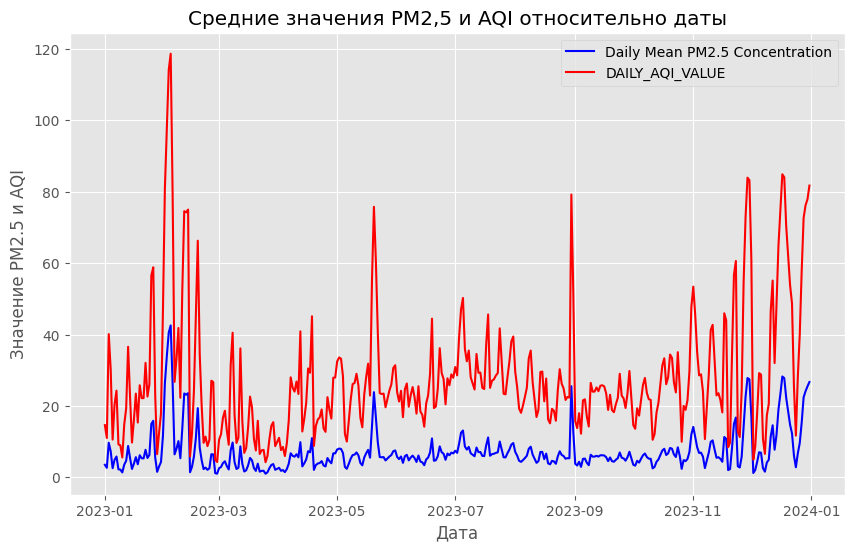

In [94]:
plt.title('Средние значения PM2,5 и AQI относительно даты')
x = mean_date['Date']
y1 = mean_date['Daily Mean PM2.5 Concentration']
y2 = mean_date['DAILY_AQI_VALUE']
plt.plot(x, y1, 'b', label='Daily Mean PM2.5 Concentration')
plt.plot(x, y2, 'r', label='DAILY_AQI_VALUE')
plt.xlabel('Дата')
plt.ylabel('Значение PM2.5 и AQI')
plt.legend()



---
В этом случае среднее значение берется по POC. Задаем значения данных для двух участков (490352005 и 490353015). Группируем значения PM2.5 по Date и POC для двух участков 490352005 и 490353015 и сбрасываем индекс.


---




In [95]:
data1 = data[data['Site ID'] == 490352005]
data2 = data[data['Site ID'] == 490353015]

plot1 = data1.groupby(['Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
plot2 = data2.groupby(['Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()

plot1


,Date,POC,Daily Mean PM2.5 Concentration
0,2023-01-01,1,4.6
1,2023-01-01,4,5.3
2,2023-01-02,1,4.0
3,2023-01-02,4,4.1
4,2023-01-03,1,12.5
...,...,...,...
720,2023-12-29,4,28.6
721,2023-12-30,1,29.2
722,2023-12-30,4,29.1
723,2023-12-31,1,32.1




---


Строим график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015).


---



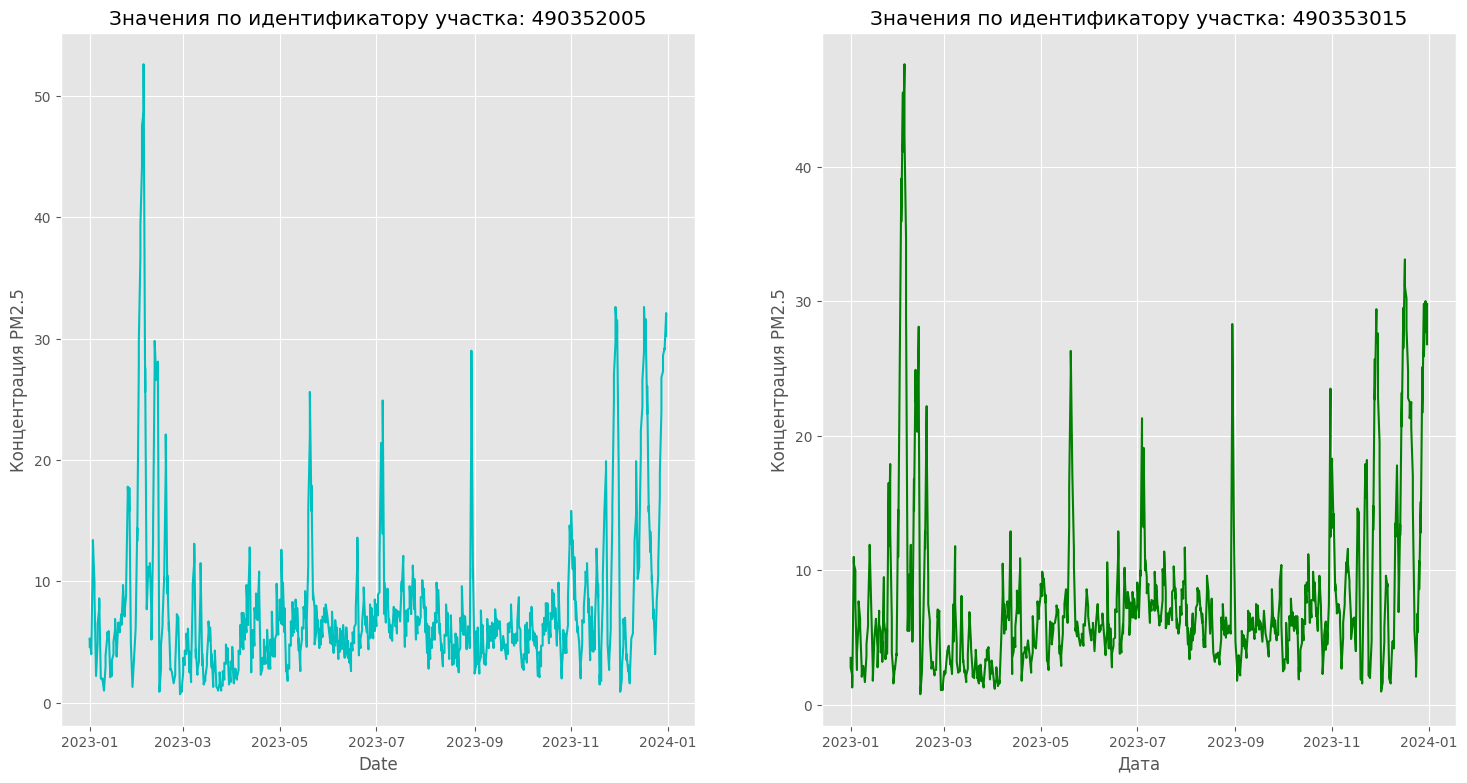

In [96]:
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.title('Значения по идентификатору участка: 490352005')
x1 = plot1['Date']
y1 = plot1['Daily Mean PM2.5 Concentration']
plt.plot(x1,y1, 'c')
plt.xlabel('Date')
plt.ylabel('Концентрация PM2.5')

plt.subplot(1, 2, 2)
plt.title('Значения по идентификатору участка: 490353015')
x2 = plot2['Date']
y2 = plot2['Daily Mean PM2.5 Concentration']
plt.plot(x2, y2, 'g')
plt.xlabel('Дата')
plt.ylabel('Концентрация PM2.5')

plt.show()


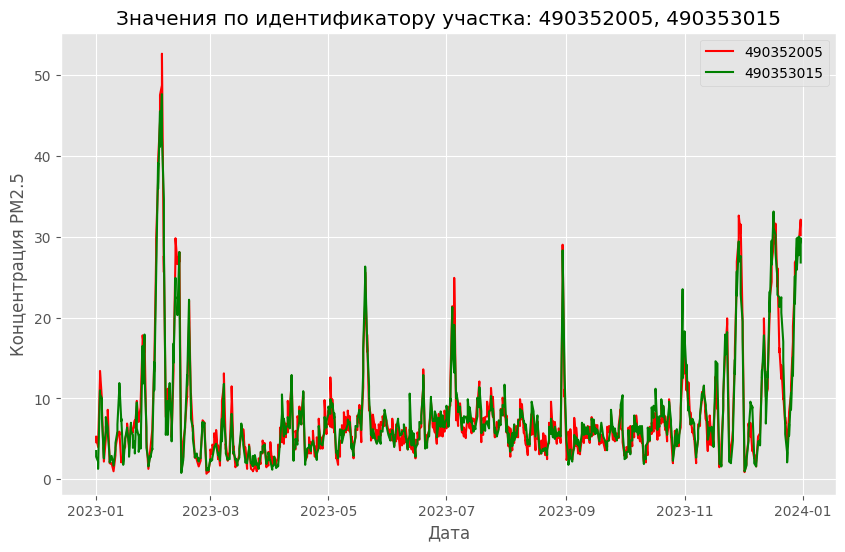

In [97]:
plt.plot(x1, y1, 'r', label = '490352005')
plt.plot(x2, y2, 'g', label = '490353015')
plt.title('Значения по идентификатору участка: 490352005, 490353015')
plt.xlabel('Дата')
plt.ylabel('Концентрация PM2.5')
plt.legend()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

In [98]:
day_AQI = data.groupby(['Date', 'Site ID', 'POC'])['DAILY_AQI_VALUE'].mean().reset_index()
day_AQI

,Date,Site ID,POC,DAILY_AQI_VALUE
0,2023-01-01,490352005,1,19.0
1,2023-01-01,490352005,4,22.0
2,2023-01-01,490353006,1,18.0
3,2023-01-01,490353006,2,28.0
4,2023-01-01,490353006,4,18.0
...,...,...,...,...
6509,2023-12-31,490353016,1,77.0
6510,2023-12-31,490354002,1,95.0
6511,2023-12-31,490354002,3,92.0
6512,2023-12-31,490450004,1,67.0


In [99]:
rolling_avg = day_AQI.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=5).mean().reset_index()
rolling_avg

,Date,DAILY_AQI_VALUE
0,2023-01-01,NaN
1,2023-01-02,NaN
2,2023-01-03,NaN
3,2023-01-04,NaN
4,2023-01-05,21.311111
...,...,...
360,2023-12-27,32.588889
361,2023-12-28,42.022222
362,2023-12-29,54.933333
363,2023-12-30,64.900000


Строим график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

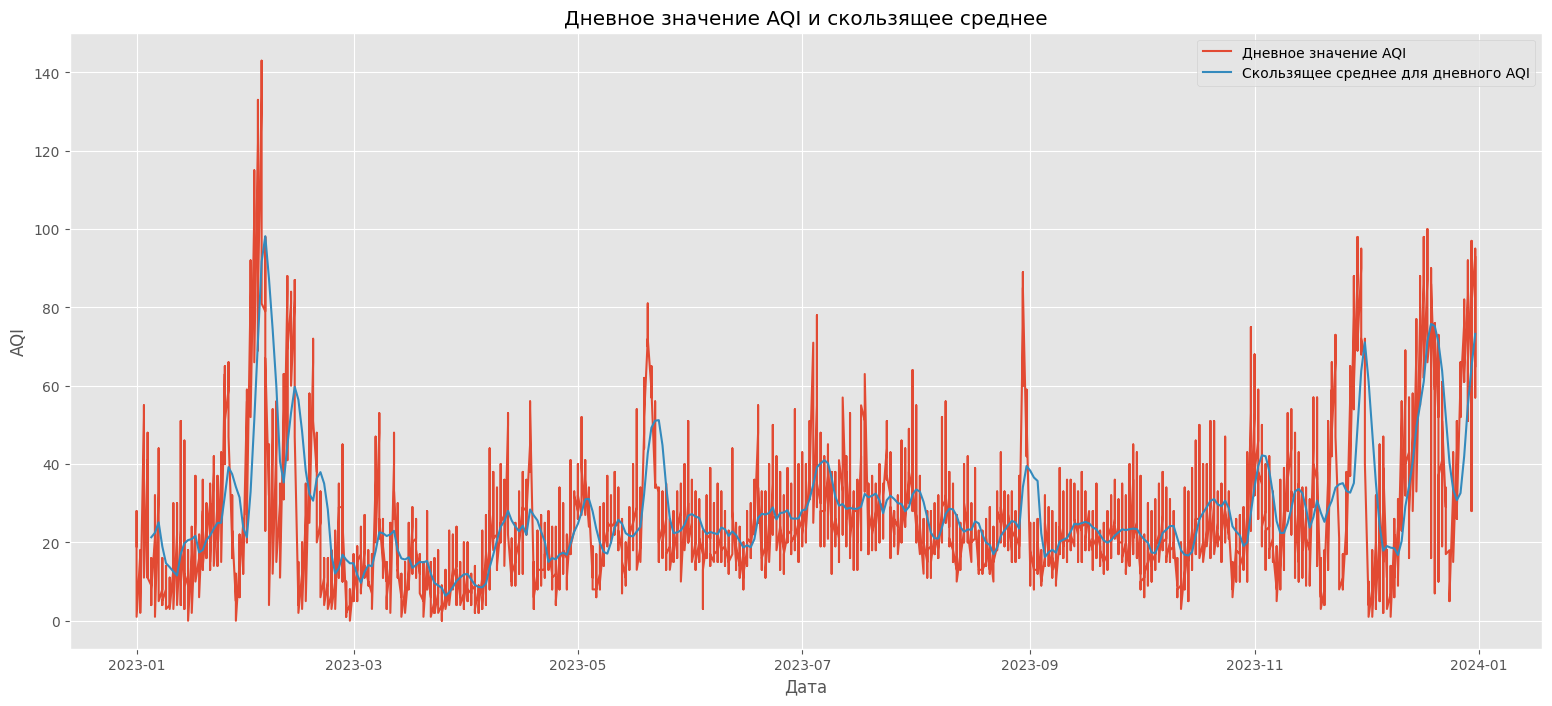

In [101]:
x1 = day_AQI['Date']
x2 = rolling_avg['Date']
y1 = day_AQI['DAILY_AQI_VALUE']
y2 = rolling_avg['DAILY_AQI_VALUE']

plt.figure(figsize=(19, 8))
plt.plot(x1, y1, label='Дневное значение AQI')
plt.plot(x2, y2, label='Скользящее среднее для дневного AQI')
plt.xlabel('Дата')
plt.ylabel('AQI')
plt.title('Дневное значение AQI и скользящее среднее')
plt.legend()

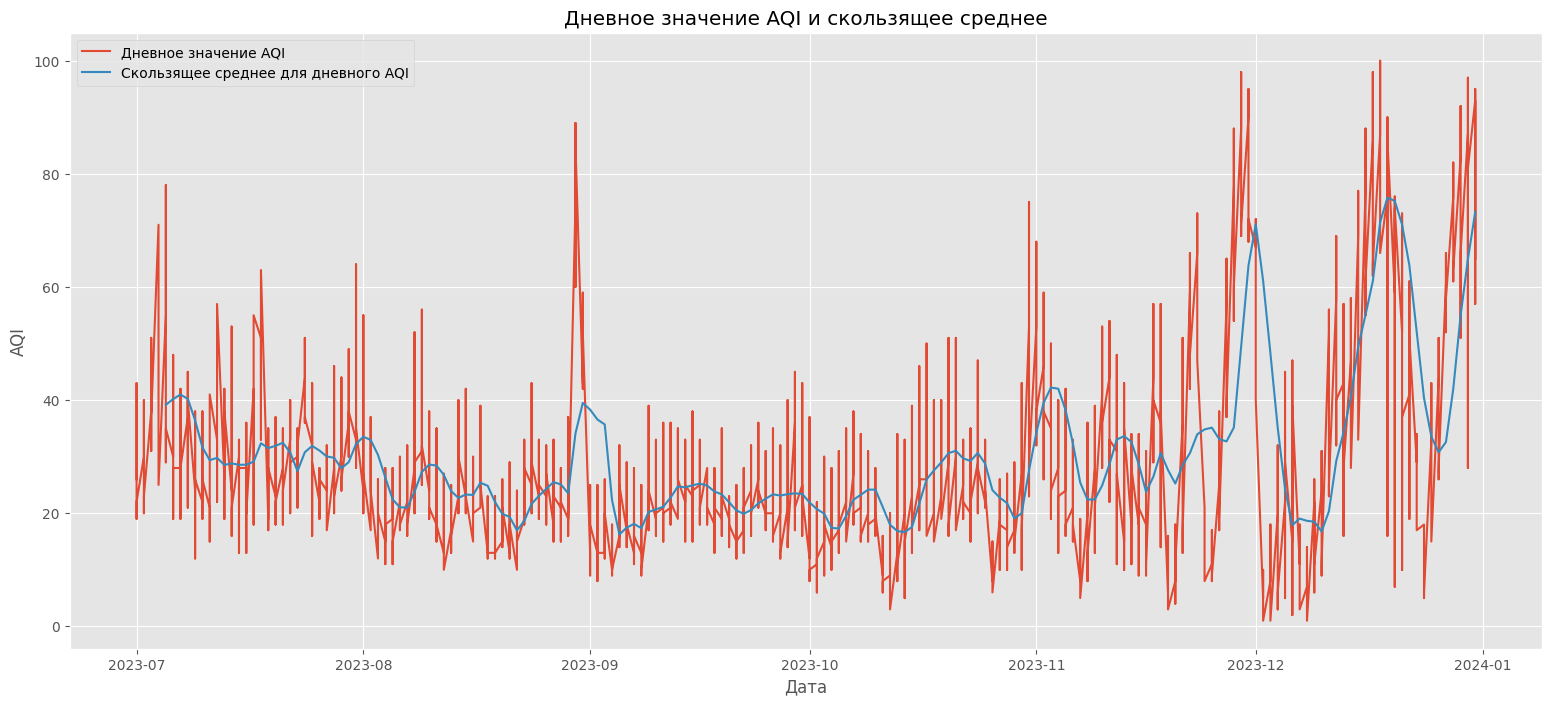

In [102]:
day_AQI1 = day_AQI[day_AQI['Date'] >= '2023-07-01']
rolling_avg1 = day_AQI1.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=5).mean().reset_index()

x1 = day_AQI1['Date']
x2 = rolling_avg1['Date']
y1 = day_AQI1['DAILY_AQI_VALUE']
y2 = rolling_avg1['DAILY_AQI_VALUE']

plt.figure(figsize=(19, 8))
plt.plot(x1, y1, label='Дневное значение AQI')
plt.plot(x2, y2, label='Скользящее среднее для дневного AQI')
plt.xlabel('Дата')
plt.ylabel('AQI')
plt.title('Дневное значение AQI и скользящее среднее')
plt.legend()

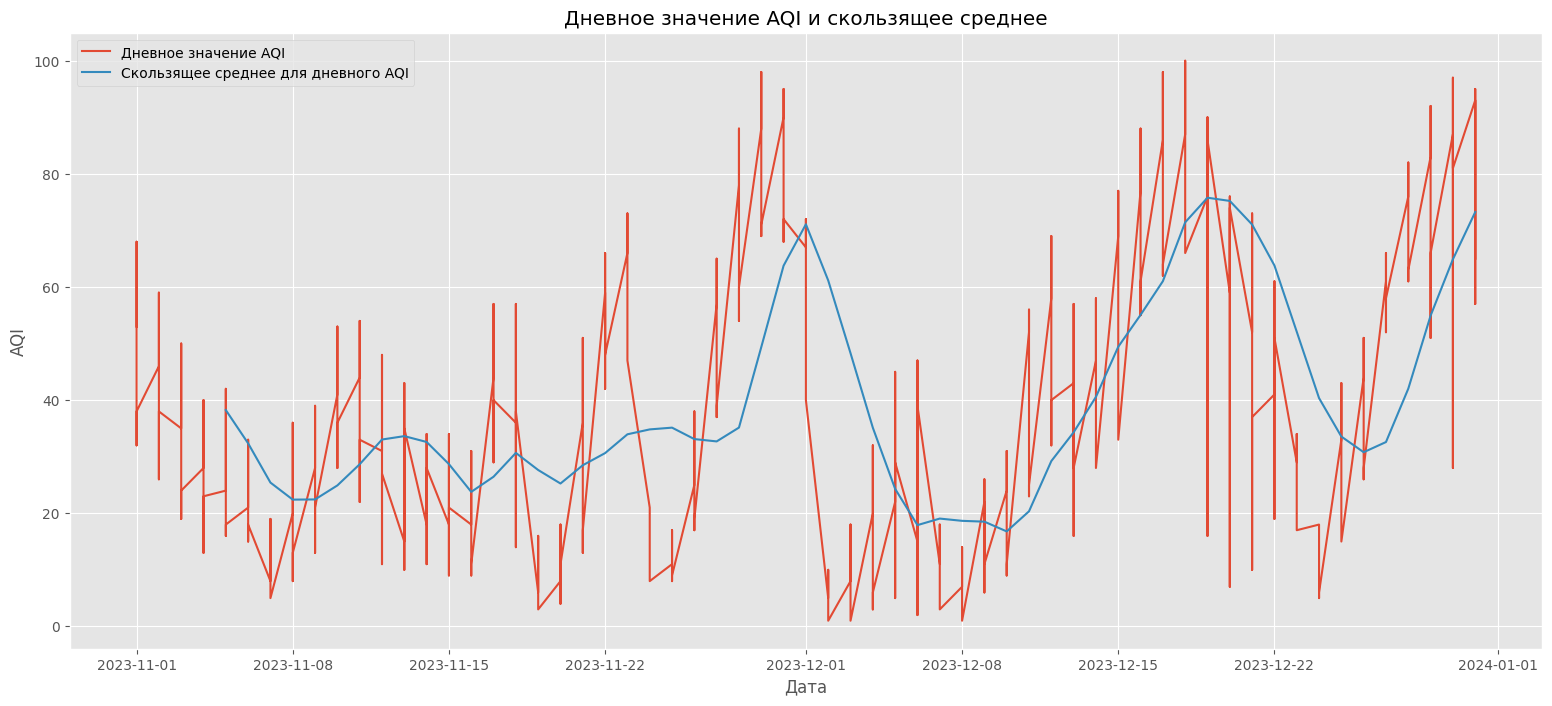

In [103]:
day_AQI1 = day_AQI[day_AQI['Date'] >= '2023-11-01']
rolling_avg1 = day_AQI1.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=5).mean().reset_index()

x1 = day_AQI1['Date']
x2 = rolling_avg1['Date']
y1 = day_AQI1['DAILY_AQI_VALUE']
y2 = rolling_avg1['DAILY_AQI_VALUE']

plt.figure(figsize=(19, 8))
plt.plot(x1, y1, label='Дневное значение AQI')
plt.plot(x2, y2, label='Скользящее среднее для дневного AQI')
plt.xlabel('Дата')
plt.ylabel('AQI')
plt.title('Дневное значение AQI и скользящее среднее')
plt.legend()

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:**
Нулевая гипотеза: **pb = pa**
Альтернативная гипотеза: **pa ! = pb**

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [84]:
import numpy as np
Na = 3000
Nb = 3000
na = 800
nb = 1000
pa = na / Na
pb = nb / Nb

p = (Na/(Na+Nb)*pa)+(Nb/(Na+Nb)*pb)
q = 1 - p
z = (pa-pb)/np.sqrt(p*q*((1/Na)+(1/Nb)))
z

-5.6343616981901095

### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [85]:
pv = norm.cdf(z)
pv

8.785395076012362e-09

In [86]:
from statsmodels. stats.proportion import proportions_ztest

z, pval = proportions_ztest(count= np.array([nb, na]), nobs= np.array([Nb, Na]) , value = pb)
print(z, round(pval,3))

-22.53744679276044 0.0


p < 0,05 - Мы отвергаем нулевую гипотезу и заявляем, что логотип B лучше!